In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
 
from pydrive.drive import GoogleDrive
 
from google.colab import auth
 
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
 
gauth = GoogleAuth()
 
gauth.credentials = GoogleCredentials.get_application_default()
 
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import files
 
file_id = '1pt3euCMJOqWqX0ozghzvI2CsT8IAiwb0'
 
downloaded = drive.CreateFile({'id': file_id})
 
downloaded.GetContentFile('Advertising.csv')

In [ ]:
import pandas as pd
veri = pd.read_csv("Advertising.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
veri.head()
veri.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
veri.info()
## Advertising veri seti popüler bir veri seti olup reklamlar ve satışlara ilişkin değerler bulundurur.
## Ayrıca eksik gözleme sahip değiliz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


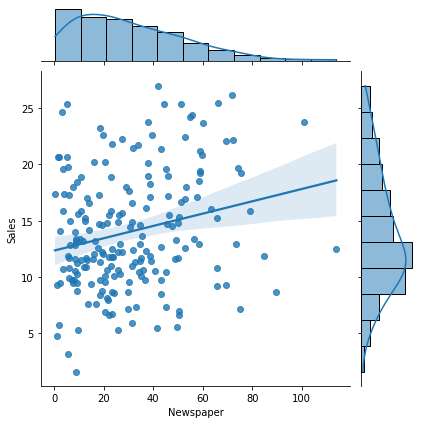

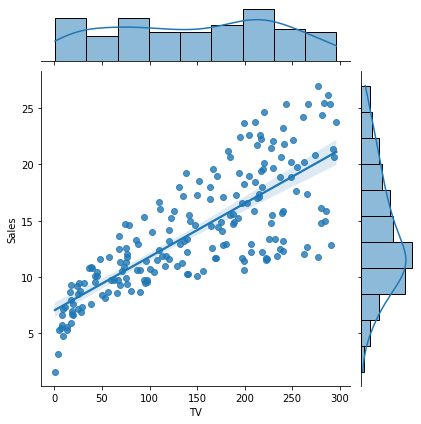

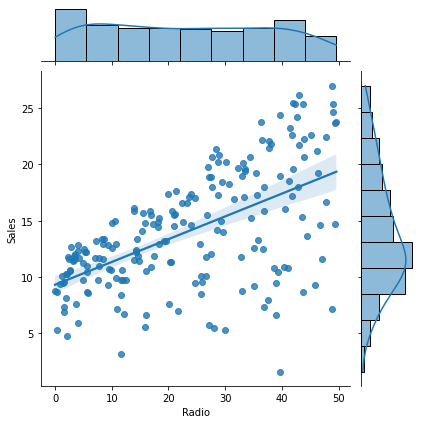

In [ ]:
import seaborn as sns
sns.jointplot(x="Newspaper", y="Sales", data=veri, kind="reg")

sns.jointplot(x="TV", y="Sales", data=veri, kind="reg")

sns.jointplot(x="Radio", y="Sales", data=veri, kind="reg")

## aşağıdaki ilişki grafiklerinde 3 türden (tv, radyo ve gazete) reklamların satış rakamları arasında en güçlü ilişki TV olduğu görülür

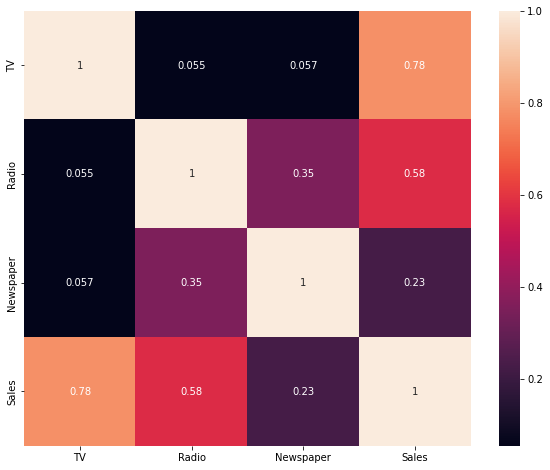

In [ ]:
fig= plt.figure(figsize=(10,8))
iliski= veri.corr()
sns.heatmap(iliski, annot=True)

## aşağıdaki ısı haritasında da "Sales" ile "TV" arasındaki ilişkinin %78 olduğu görülmektedir.
## buradan TV reklamlarının satış oranlarında güçlü bir etkiye sahip olduğu söylenebilir.
## TV reklamlarının ardından Radyo reklamlarının da satışlarda önemli bir etkiye sahip olduğu söylenebilir

## Buradan insanların dinleme ve görsel açıdan reklamlardan daha çok etkilendiği yorumu yapılabilir.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
bagımlı= veri[['Sales']]
bagımsız = veri[['Newspaper']]


In [ ]:
reg = LinearRegression()
reg_model = reg.fit(bagımsız,bagımlı)

In [ ]:
reg_model

LinearRegression()

In [ ]:
dir(reg_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [ ]:
b0= reg_model.intercept_
b1= reg_model.coef_

In [ ]:
r2 = reg_model.score(bagımsız,bagımlı)

In [ ]:
r2
## bağımlı değişkendeki değişimin bağımsız değişkence açıklanma yüzdesi
## Yani satışların %5 i gazete reklamlarıyla açıklanmaktadır.
## bu da güçlü bir ilişki için yeterli bir açıklama oranı değildir.

0.05212044544430516

In [ ]:
bagımsız_tv = veri[["TV"]]
reg_model_tv = reg.fit(bagımsız_tv,bagımlı)

In [ ]:
reg_model_tv

LinearRegression()

In [ ]:
reg_model_tv.score(bagımsız_tv,bagımlı)
## burada R2 değeri %61 çıkmıştır.
## Yani, satışların %61 i tv reklamları ile açıklanabilmektedir.
## bu da güçlü bir ilişki için yeterli bir açıklama oranıdır.

0.611875050850071

In [ ]:
## model anlamlılığı tespiti ##
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
bagımsız = sm.add_constant(bagımsız)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
results = sm.OLS(bagımlı,bagımsız).fit()
A = np.identity(len(results.params))
A = A[1:,:]
results.f_test(A)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[10.88729908]]), p=0.0011481958688882633, df_denom=198, df_num=1>

In [ ]:
results.summary()

# H0: Kurulan regresyon modeli anlamlı değildir.
# HS: Kurulan regresyon modeli anlamlıdır.

## p-value < 0.05 olduğundan (prob f-statistic) H0 reddedilir. 
## satış oranları ile gazete reklamları arasında doğrusal bir ilişki olduğundan bahsedebiliriz.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 15 Mar 2022   Prob (F-statistic):            0.00115
Time:                        09:56:26   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## Stats model kütüphanesinden de basit regresyon analizi yapılabilir.
## Buradan summary komutu daha rahatlıkla kullanılıp istenen değerler yorumlanabilir.
from statsmodels.regression.linear_model import OLS
from statsmodels.formula.api import ols
model = ols("Sales ~ Newspaper", veri) 
reg_model_yeni = model.fit()

In [ ]:
reg_model_yeni.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 15 Mar 2022   Prob (F-statistic):            0.00115
Time:                        10:04:40   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TV reklamlarının satış oranları üzerindeki etkisinin regresyon grafiği')

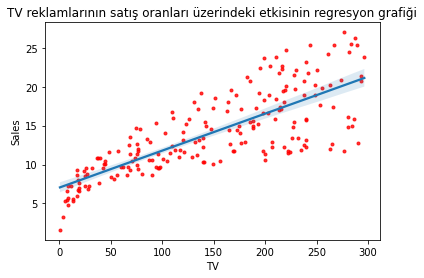

In [ ]:
#### Son olarak modelimizin anlamlı olduğunu tespit ettikten sonra regresyon grafiğimizi çizelim
## regresyon grafiklerinde değişkenler tek kolondan oluşmalıdır. 
## bu nedenle newspaper bağımsız değişkeni için oluşturduğumuz const zorlaması sıkıntıya yol açabilir
import seaborn as sns

reg_graph = sns.regplot(bagımsız_tv, bagımlı, scatter_kws={'color':'r','s':9})
reg_graph.set_title("TV reklamlarının satış oranları üzerindeki etkisinin regresyon grafiği")


## mavi renkteki doğrusal çizgi, TV reklamları ile satış arasındaki ilişki ifade eden doğrusal bir fonksiyondur.

In [ ]:
##  ayrıca parametre anlamlılığı için t-testi, model anlamlılığı için f-testi yapılmaktadır.
## parametre anlamlılığı en iyi modelin tespiti için önemlidir. 
## Bu nedenle model anlamlılığı yaparken aynı zamanda parametre anlamlılığı da yapılır (signif)
## Ayrıca parametre anlamlılığı güven aralıklarıyla da tespit edilebilir.
## parametre güven aralığı sıfırı barındırıyorsa o parametre anlamlı değildir. 
# B0 = 0
# B0 != 0

In [ ]:
######### Tahmin yapma
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
tahmin = reg_model_tv.predict(bagımsız_tv)
tahmin_df = pd.DataFrame(tahmin, columns=["tahmin_degerleri"])

In [ ]:
tahmin_df["Gerçek Değerler"] = veri[["Sales"]]
tahmin_df["Tahmin_hatası"] = tahmin_df["Gerçek Değerler"] - tahmin_df["tahmin_degerleri"]

In [ ]:
tahmin_df['Tahmin_hatası'].max()
## max tahmin hatası 7.21

7.212368668744677

In [ ]:
metrics.r2_score(bagımlı,tahmin)
## modelin tahmin performansı %61

0.611875050850071

In [ ]:
metrics.mean_squared_error(bagımlı,tahmin)
## hata kareler ortalaması 

10.512652915656757

**Çoklu Doğrusal Regresyon**


In [ ]:
veri.head()
veri.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
## bağımlı ve bağımsız değişkenlerin atamasını yapalım
y_bagımlı = veri[['Sales']]
x_bagımsız = veri.drop("Sales", axis=1)

In [ ]:
## Çoklu doğrusal regresyon modeli
## Bunun için stats model ve scikitlearn kütüphaneleri kullanılmaktadır

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
reg = sm.OLS(y_bagımlı,x_bagımsız)
reg_model = reg.fit()

In [ ]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):                   2.43e-171
Time:                        14:00:24   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
Radio          0.2222      0.009     23.595      0.000       0.204       0.241
Newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## scikit learn kütüphanesiyle regresyon modeli kurmak
from sklearn.linear_model import LinearRegression

In [ ]:
reg_sl = LinearRegression()
reg_sl_model = reg_sl.fit(x_bagımsız,y_bagımlı)

In [ ]:
r2_skore = reg_sl_model.score(x_bagımsız,y_bagımlı)
r2_skore

0.8972106381789522